In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from statsmodels.tsa.stattools import adfuller
import seaborn as sns

from statsmodels.tsa.stattools import adfuller

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# DataFrame's zum umcodieren der kategoriellen Daten ex Country

# Moody's Rating
ratings = ["A1", "A2", "A3", "Aa1", "Aa2", "Aa3", 
           "Aaa", "B1", "B2", "B3", "Ba1", "Ba2", 
           "Ba3", "Baa1", "Baa2", "Baa3", "C",
           "Ca", "Caa1", "Caa2", "Caa3", "NR"]
df_rating = pd.DataFrame({"Rating" : ratings, "Code" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19 , 20 , 21, np.nan]})

regions = ["Africa", "Asia", "Australia & New Zealand", "Caribbean",
           "Central and South America", "Eastern Europe & Russia",
           "Middle East","North America", "Western Europe"]
df_regions = pd.DataFrame({"Region" : regions, "Code" : [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [44]:
df_ERP = pd.read_csv("ERP_by_country.csv", sep = ";")
df_ERP = df_ERP.drop(columns = ["a", "b", "Unnamed: 11"])

for i in range(len(df_ERP)):
    ERP_rat = df_ERP.at[i, "Moody's rating"]
    for j in range(len(df_rating)):
        old_rat = df_rating.at[j, "Rating"]
        new_rat = df_rating.at[j, "Code"]
        if (ERP_rat == old_rat):
            df_ERP.at[i, "Moody's rating"] = new_rat
            break
        else:
            continue
            
for i in range(len(df_ERP)):
    ERP_reg = df_ERP.at[i, "Region"]
    for j in range(len(df_regions)):
        old_reg = df_regions.at[j, "Region"]
        new_reg = df_regions.at[j, "Code"]
        if (ERP_reg == old_reg):
            df_ERP.at[i, "Region"] = new_reg
            break
        else:
            continue
#df_ERP = df_ERP.set_index("Country")

## Begriffserklärungen

__Total Equity Risk Premium:__ ist die zusätzliche Rendite, die ein Investor erhält, wenn er in ein bestimmtes Land investiert verglichen zum weltweiten Equity Markt (risk-free rate). 

In [45]:
df_ERP

,Country,Region,Moody's rating,Rating-based Default Spread,Total Equity Risk Premium,Country Risk Premium,"Sovereign CDS, net of US",Total Equity Risk Premium2,Country Risk Premium3
0,Abu Dhabi,7,5.0,0.42,4.73,0.49,0.58,4.91,0.67
1,Albania,6,8.0,3.83,8.69,4.45,NaN,NaN,NaN
2,Andorra (Principality of),9,15.0,1.62,6.12,1.88,NaN,NaN,NaN
3,Angola,1,10.0,5.53,10.67,6.43,5.75,10.92,6.68
4,Argentina,5,18.0,10.21,16.11,11.87,23.13,31.12,26.88
...,...,...,...,...,...,...,...,...,...
152,Uruguay,5,15.0,1.62,6.12,1.88,1.27,5.72,1.48
153,Uzbekistan,6,8.0,3.83,8.69,4.45,NaN,NaN,NaN
154,Venezuela,5,17.0,17.50,24.58,20.34,NaN,NaN,NaN
155,Vietnam,2,13.0,3.06,7.80,3.56,1.37,5.83,1.59


`Country Risk Premium` und `Total Equity Risk Premium` haben nahezu die gleiche Dichtefunktion, aber mit verschiedenen Mittelwerten.

<AxesSubplot:xlabel='Country Risk Premium', ylabel='Density'>

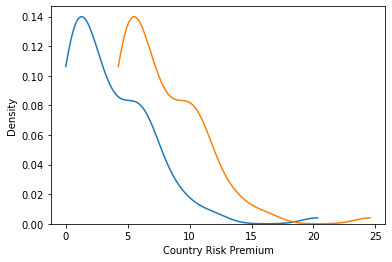

In [46]:
sns.kdeplot(data=df_ERP, x = "Country Risk Premium", cut = 0)
sns.kdeplot(data=df_ERP, x = "Total Equity Risk Premium", cut = 0)

## Augmented Dickey Fuller Test

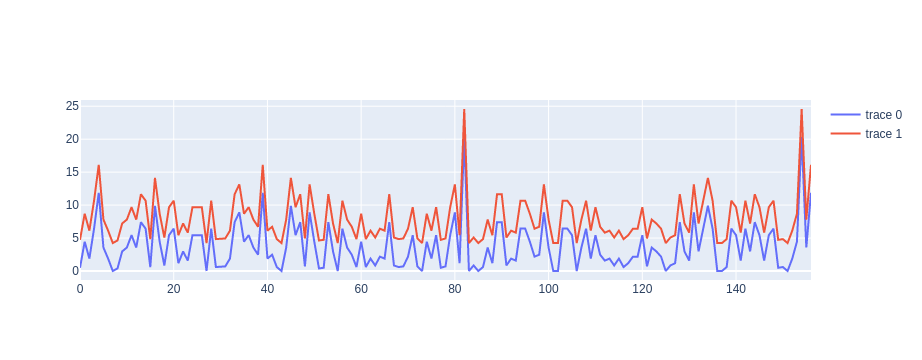

In [25]:
country_series = df_ERP.loc[:, 'Country Risk Premium'].values
total_series = df_ERP.loc[:, 'Total Equity Risk Premium'].values

fig = make_subplots(rows=1, cols=1)
fig.add_trace(go.Scatter(x = df_ERP.index, y = country_series, mode = "lines"))
fig.add_trace(go.Scatter( x = df_ERP.index, y = total_series, mode = "lines"))
fig.show()

In [18]:
# ADF for Country Risk Premium
result = adfuller(country_series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -11.971670956328943
n_lags: 3.8853851430853146e-22
p-value: 3.8853851430853146e-22
Critial Values:
   1%, -3.4729792729247793
Critial Values:
   5%, -2.8802520918255534
Critial Values:
   10%, -2.5767469641683105


In [26]:
# ADF for Total Equity Risk Premium
result = adfuller(total_series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -11.971670956328941
n_lags: 3.885385143085342e-22
p-value: 3.885385143085342e-22
Critial Values:
   1%, -3.4729792729247793
Critial Values:
   5%, -2.8802520918255534
Critial Values:
   10%, -2.5767469641683105


### Beide Merkmale sind stationary und statistisch nahezu identisch. Einzig der Mittelwert zwischen beiden Merkmalen ist verschoben.

## Skalierung der Daten

In [50]:
df_ERP = df_ERP.dropna()
df_ERP = df_ERP.drop(columns = ["Country"])

In [51]:
scaler = RobustScaler()
df_ERP_scaled = pd.DataFrame(scaler.fit_transform(df_ERP), columns = df_ERP.columns)
df_ERP_scaled.describe()

,Region,Moody's rating,Rating-based Default Spread,Total Equity Risk Premium,Country Risk Premium,"Sovereign CDS, net of US",Total Equity Risk Premium2,Country Risk Premium3
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,-0.106996,0.066358,0.253036,0.254209,0.254209,0.733147,0.731948,0.731948
std,0.475299,0.690925,0.944193,0.943660,0.943660,1.887567,1.885911,1.885911
min,-0.833333,-1.000000,-0.658537,-0.657343,-0.657343,-0.305439,-0.305755,-0.305755
25%,-0.666667,-0.375000,-0.414634,-0.412587,-0.412587,-0.167364,-0.169065,-0.169065
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.333333,0.625000,0.585366,0.587413,0.587413,0.832636,0.830935,0.830935
max,0.500000,1.500000,3.491870,3.493007,3.493007,9.372385,9.363309,9.363309


### Country Risk Premium soll ermittelt werden

In [56]:
X1 = df_ERP_scaled.drop(columns = ["Country Risk Premium", "Total Equity Risk Premium"])
Y1 = df_ERP_scaled["Country Risk Premium"]

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1,Y1, test_size = 0.2, random_state = 42)
X1_train

,Region,Moody's rating,Rating-based Default Spread,"Sovereign CDS, net of US",Total Equity Risk Premium2,Country Risk Premium3
61,0.000000,0.875,0.101626,0.326360,0.327338,0.327338
55,-0.166667,0.625,-0.105691,0.163180,0.161871,0.161871
40,-0.666667,-0.500,-0.487805,-0.238494,-0.237410,-0.237410
9,-0.833333,0.000,1.243902,1.104603,1.104317,1.104317
64,-0.833333,0.500,0.585366,0.728033,0.726619,0.726619
...,...,...,...,...,...,...
20,-0.833333,0.000,1.243902,2.016736,2.014388,2.014388
60,0.000000,0.875,0.101626,0.133891,0.133094,0.133094
71,0.500000,-0.250,-0.658537,-0.305439,-0.305755,-0.305755
14,-0.166667,0.000,1.243902,1.255230,1.255396,1.255396


In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X1_train, Y1_train)
lin_reg.coef_

array([ 3.61556040e-04, -9.52214920e-04,  1.00006582e+00, -2.12785235e-01,
        1.06454314e-01,  1.06454314e-01])

In [58]:
y1_pred = lin_reg.predict(X1_test)
y1_pred

array([-0.36336184, -0.48629651, -0.41216905,  0.10164845, -0.65683125,
       -0.44947792, -0.65724575,  2.45454692, -0.51825369, -0.41257278,
        1.59086612,  1.9349778 , -0.24191307, -0.41202257,  0.38263695,
       -0.10470825, -0.1054821 ])

In [59]:
print("MSE: " + str(mse(Y1_test, y1_pred)))
print("MAE: " + str(mae(Y1_test, y1_pred)))
print("R2-Score: " + str(r2_score(Y1_test, y1_pred)))

MSE: 1.6295321800073566e-06
MAE: 0.0008507473067720454
R2-Score: 0.9999981009238726



Teil 2 der Einzelübung bis kommender Woche